# Install Libraries

In [ ]:
!pip install -q numpy pandas altair scikit-learn tensorflow

# Memory Cell
Recurrent Neural Network의 핵심은 바로 자신의 출력 또는 상태를 입력으로 삼는 Memory Cell이다.


<div align='center'>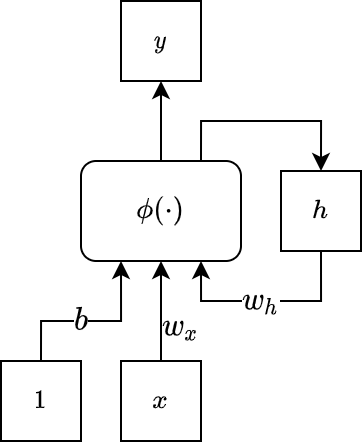</div>

위와 같은 Memory Cell을 펼치면Unroll 다음과 같은 형식의 Neural Network가 된다





<div align='center'>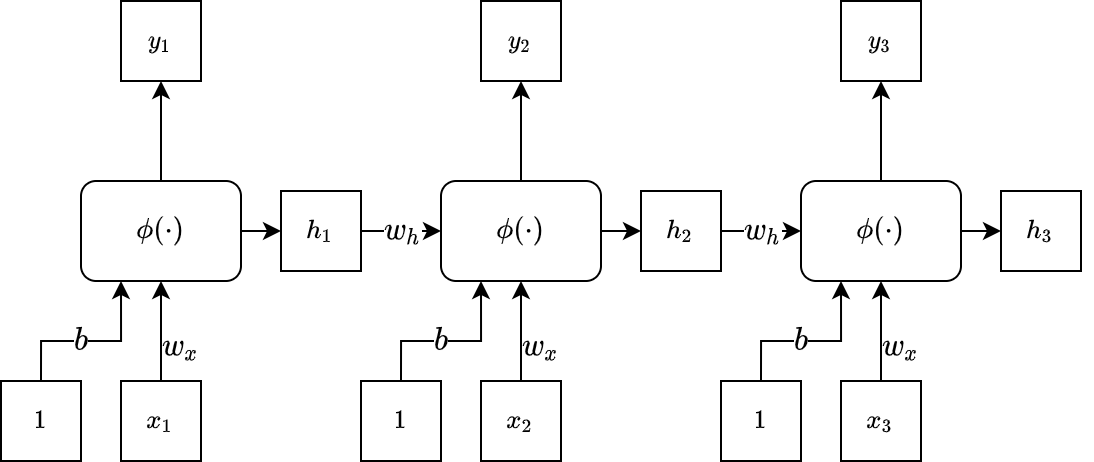</div>

## Simple Memory Cell

그럼, 위와 같은 RNN을 Keras로 구현해보자. [keras.layers.SimpleRNN](https://keras.io/api/layers/recurrent_layers/simple_rnn/)을 사용하면 된다.

In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.Input(
        shape=(None, 1) # 1차원 입력을 받는다.
    ),
    keras.layers.SimpleRNN(
        units = 1, # Memory Cell을 하나만 생성하겠다.
    )
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Generalized Memory Cells

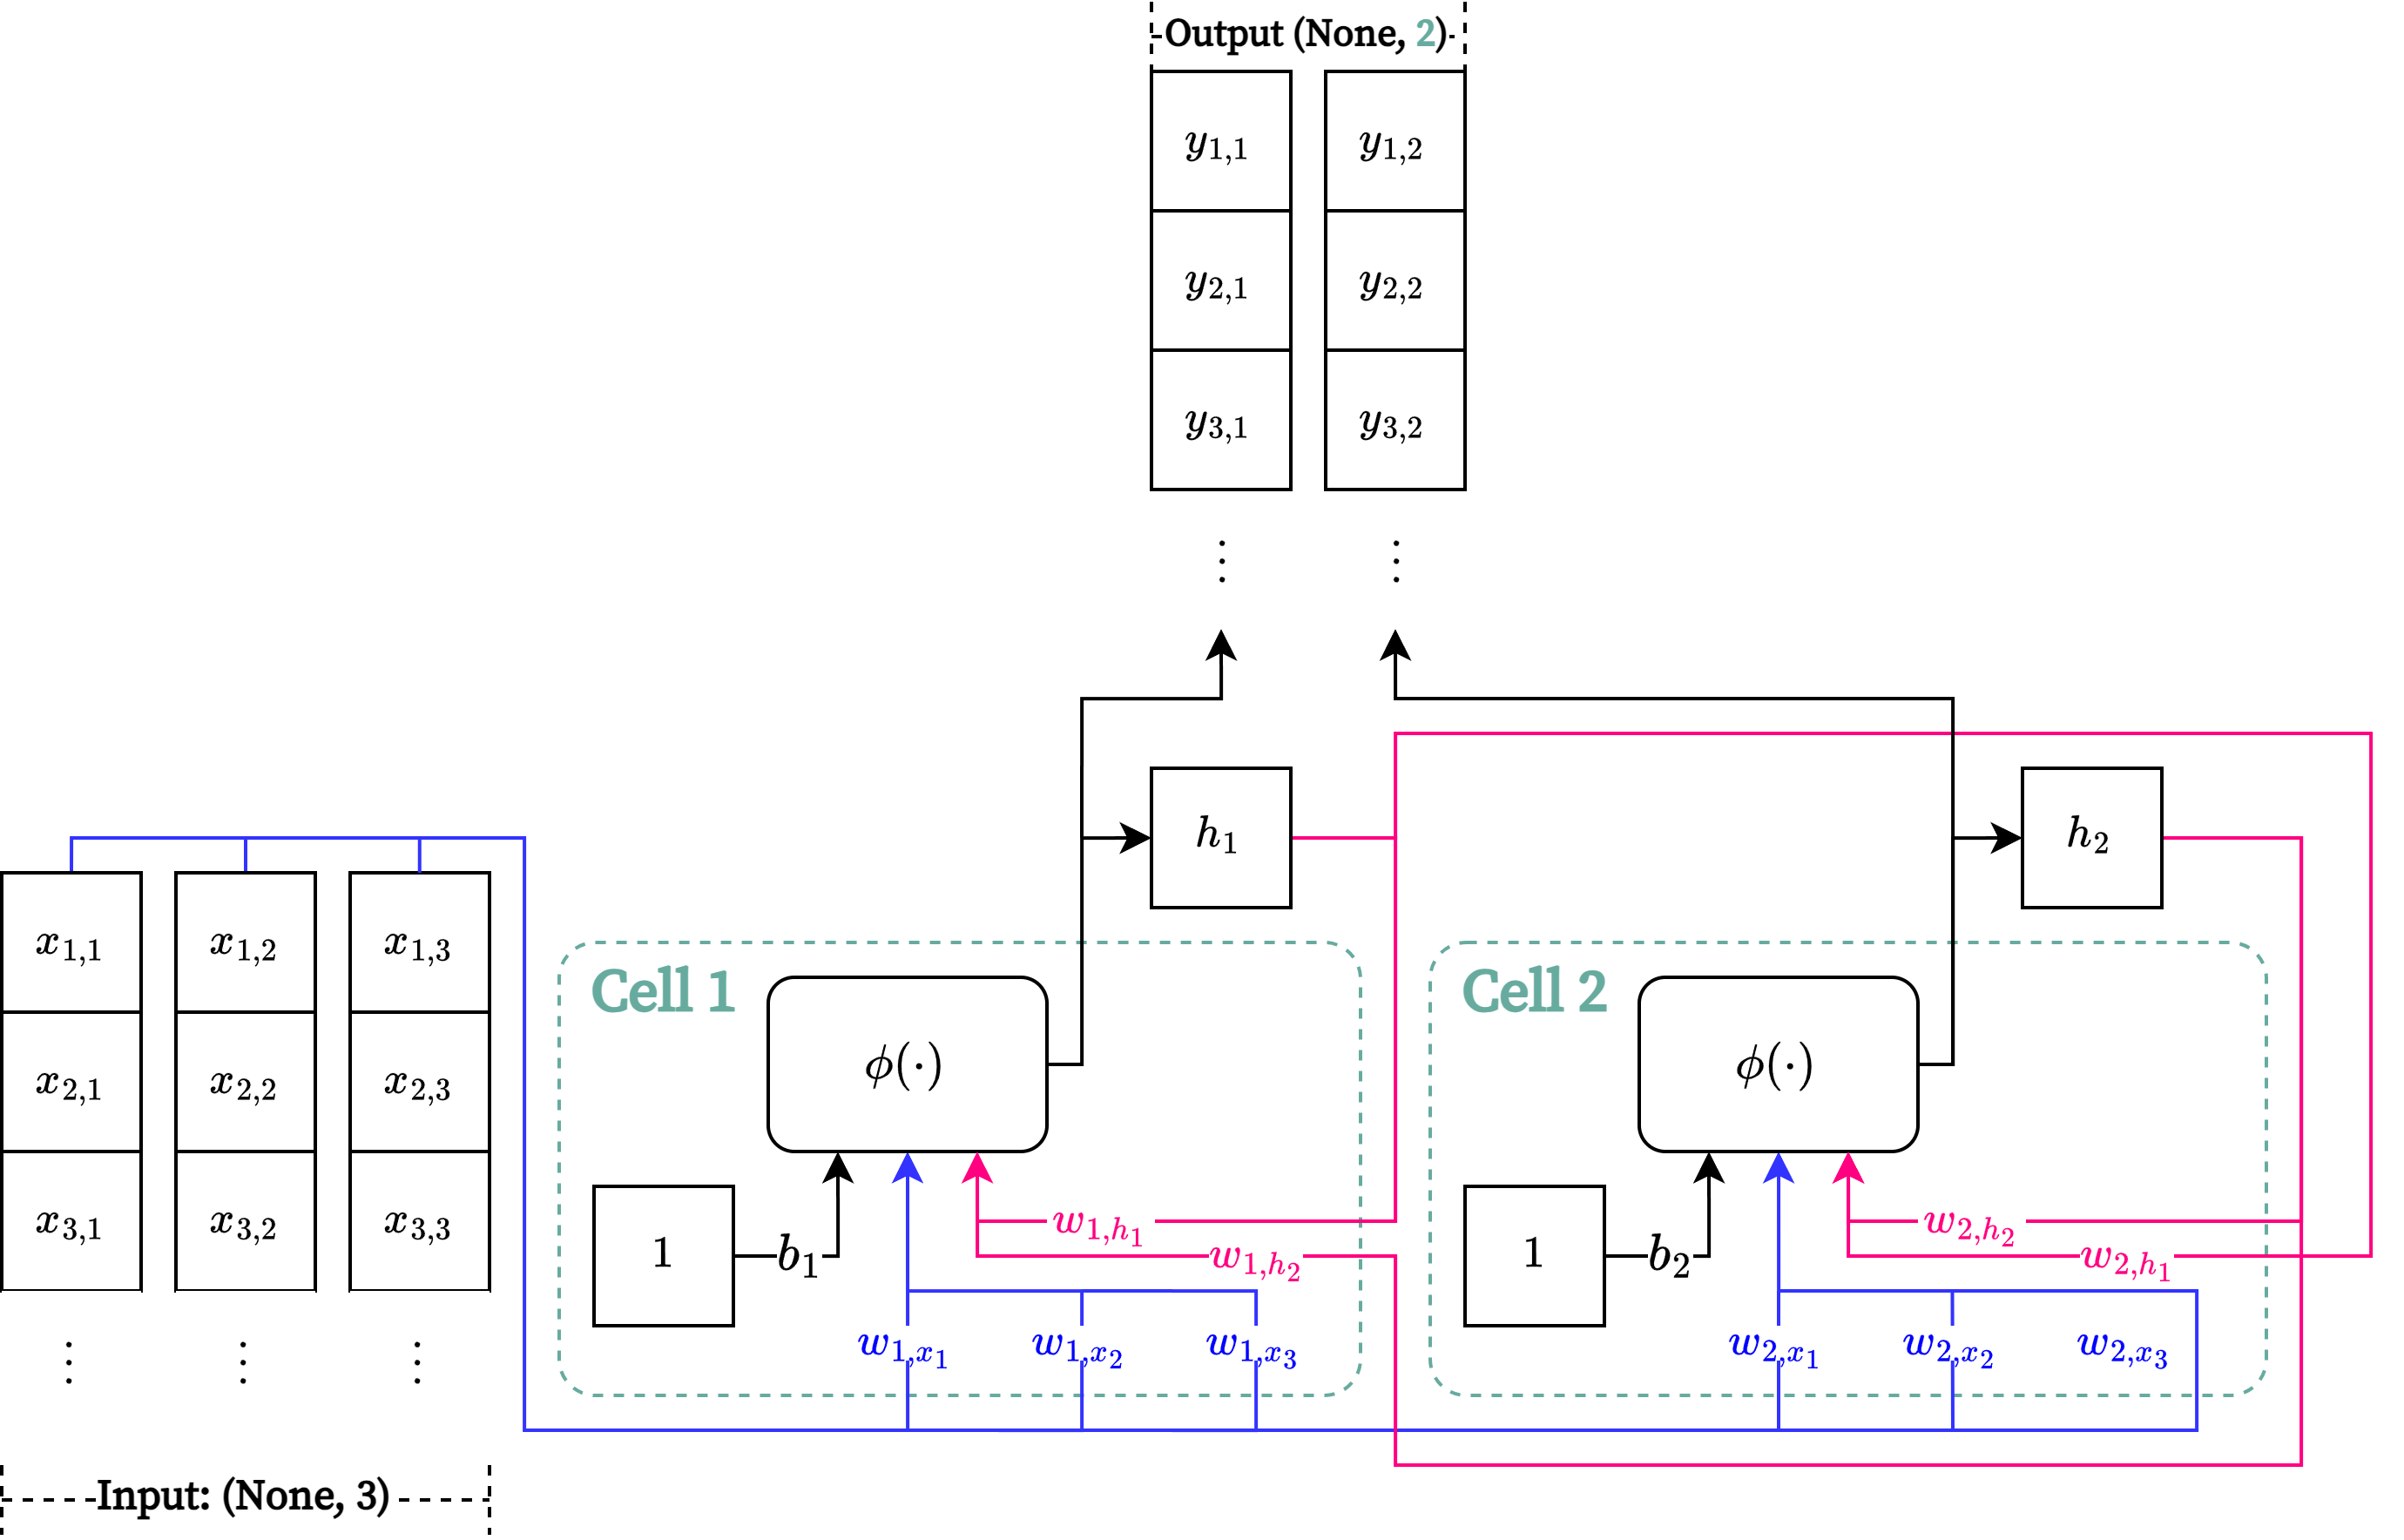

그럼, 이번엔 보다 일반적인 형태의 Memory Cell을 만들어보자.

In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.Input(
        shape=(None, 3) # 3차원 입력을 받는다.
    ),
    keras.layers.SimpleRNN(
        units = 2, # Memory Cell을 두개 생성하겠다.
    )
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 2)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


보다시피, 훈련해야하는 매개변수는 다음과 같다:
* 입력 값에 대한 매개변수: 3차원 X 2개 셀 = 6개
* 상태 값에 대한 매개변수: 2차원 (2개의 셀이 하나씩 상태값을 출력함) X 2개 셀 = 4개
* 편차: 1개 X 2개 셀 = 2개


## Another Way

위와 같이 [keras.layers.SimpleRNN](https://keras.io/api/layers/recurrent_layers/simple_rnn/) 등을 활용하지 않고, 직접 Memory Cell을 선언할 수도 있다. 기본 RNN Layer 구현체인 [keras.layers.RNN](https://keras.io/api/layers/recurrent_layers/rnn/)의 **cell**인자에 [keras.layers.SimpleRNNCell](https://keras.io/api/layers/recurrent_layers/simple_rnn_cell/) 인스턴스를 넣는 방법이다.

In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.Input(
        shape=(None, 3)
    ),
    keras.layers.RNN(
        cell = keras.layers.SimpleRNNCell(
            units = 2,
        ),
    )
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnn (RNN)                   (None, 2)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


두 방법 모두 출력값은 동일하다. 하지만, 내부적으로 구현된 방법이 조금 다르다.
* Layer 구현 (e.g., *keras.layers.SimpleRNN*): 구현이 간편하고, 내부적으로 GPU 사용에 최적화되어 있다.
* Cell 구현 (e.g., *keras.layers.SimpleRNNCell*): Layer 구현보다 귀찮고, GPU 사용에도 최적화되어 있지 않다. 하지만, 맞춤형 RNN Cell을 만드려고 한다면 이를 활용할 수 밖에 없다.


# Stacked Recurrent Neural Network

<div align='center'>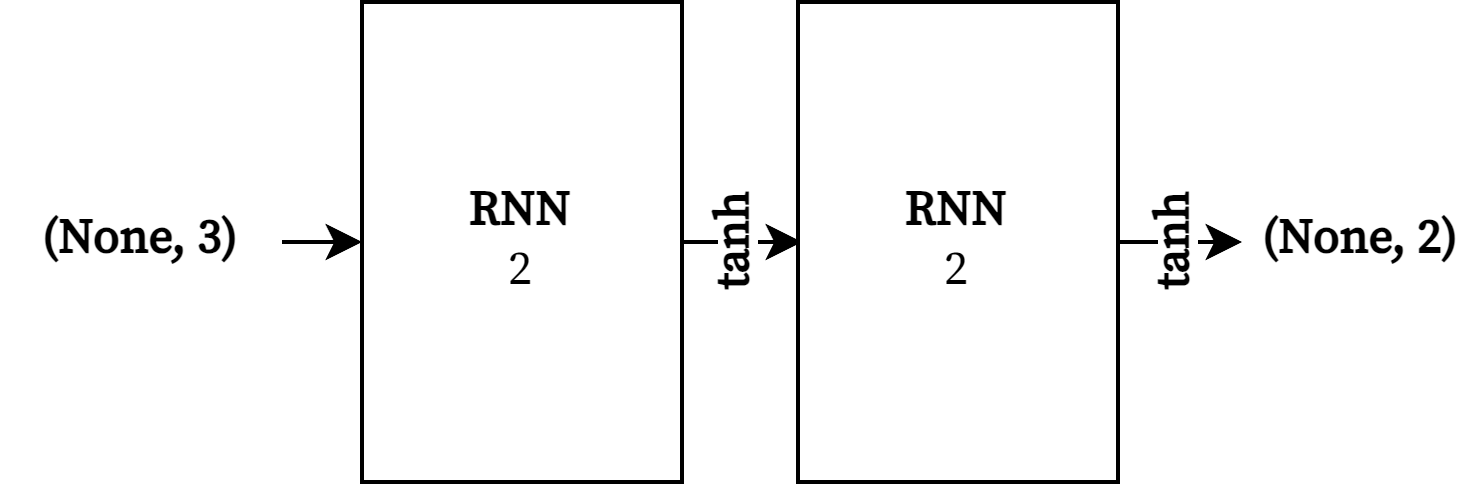</div>


위처럼 RNN을 여러 개 연결하고 싶다면 어떻게 할까?

In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.Input(
        shape=(None, 3)
    ),
    keras.layers.SimpleRNN(
        units = 2,
        activation=keras.activations.tanh,
        input_shape=(4, 3),
        return_sequences=True
    ),
     keras.layers.SimpleRNN(
        units = 2,
        activation=keras.activations.tanh,
        return_sequences=False
    )
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, None, 2)           12        
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 2)                 10        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


단순히 그저 두 개의 RNN Layer를 연결하면 된다. 하지만, 뭔가 달라진 걸 볼 수 있다. 바로, 첫 번째 RNN의 **return_sequences** 인자다.

## Output Sequence


<div align='center'>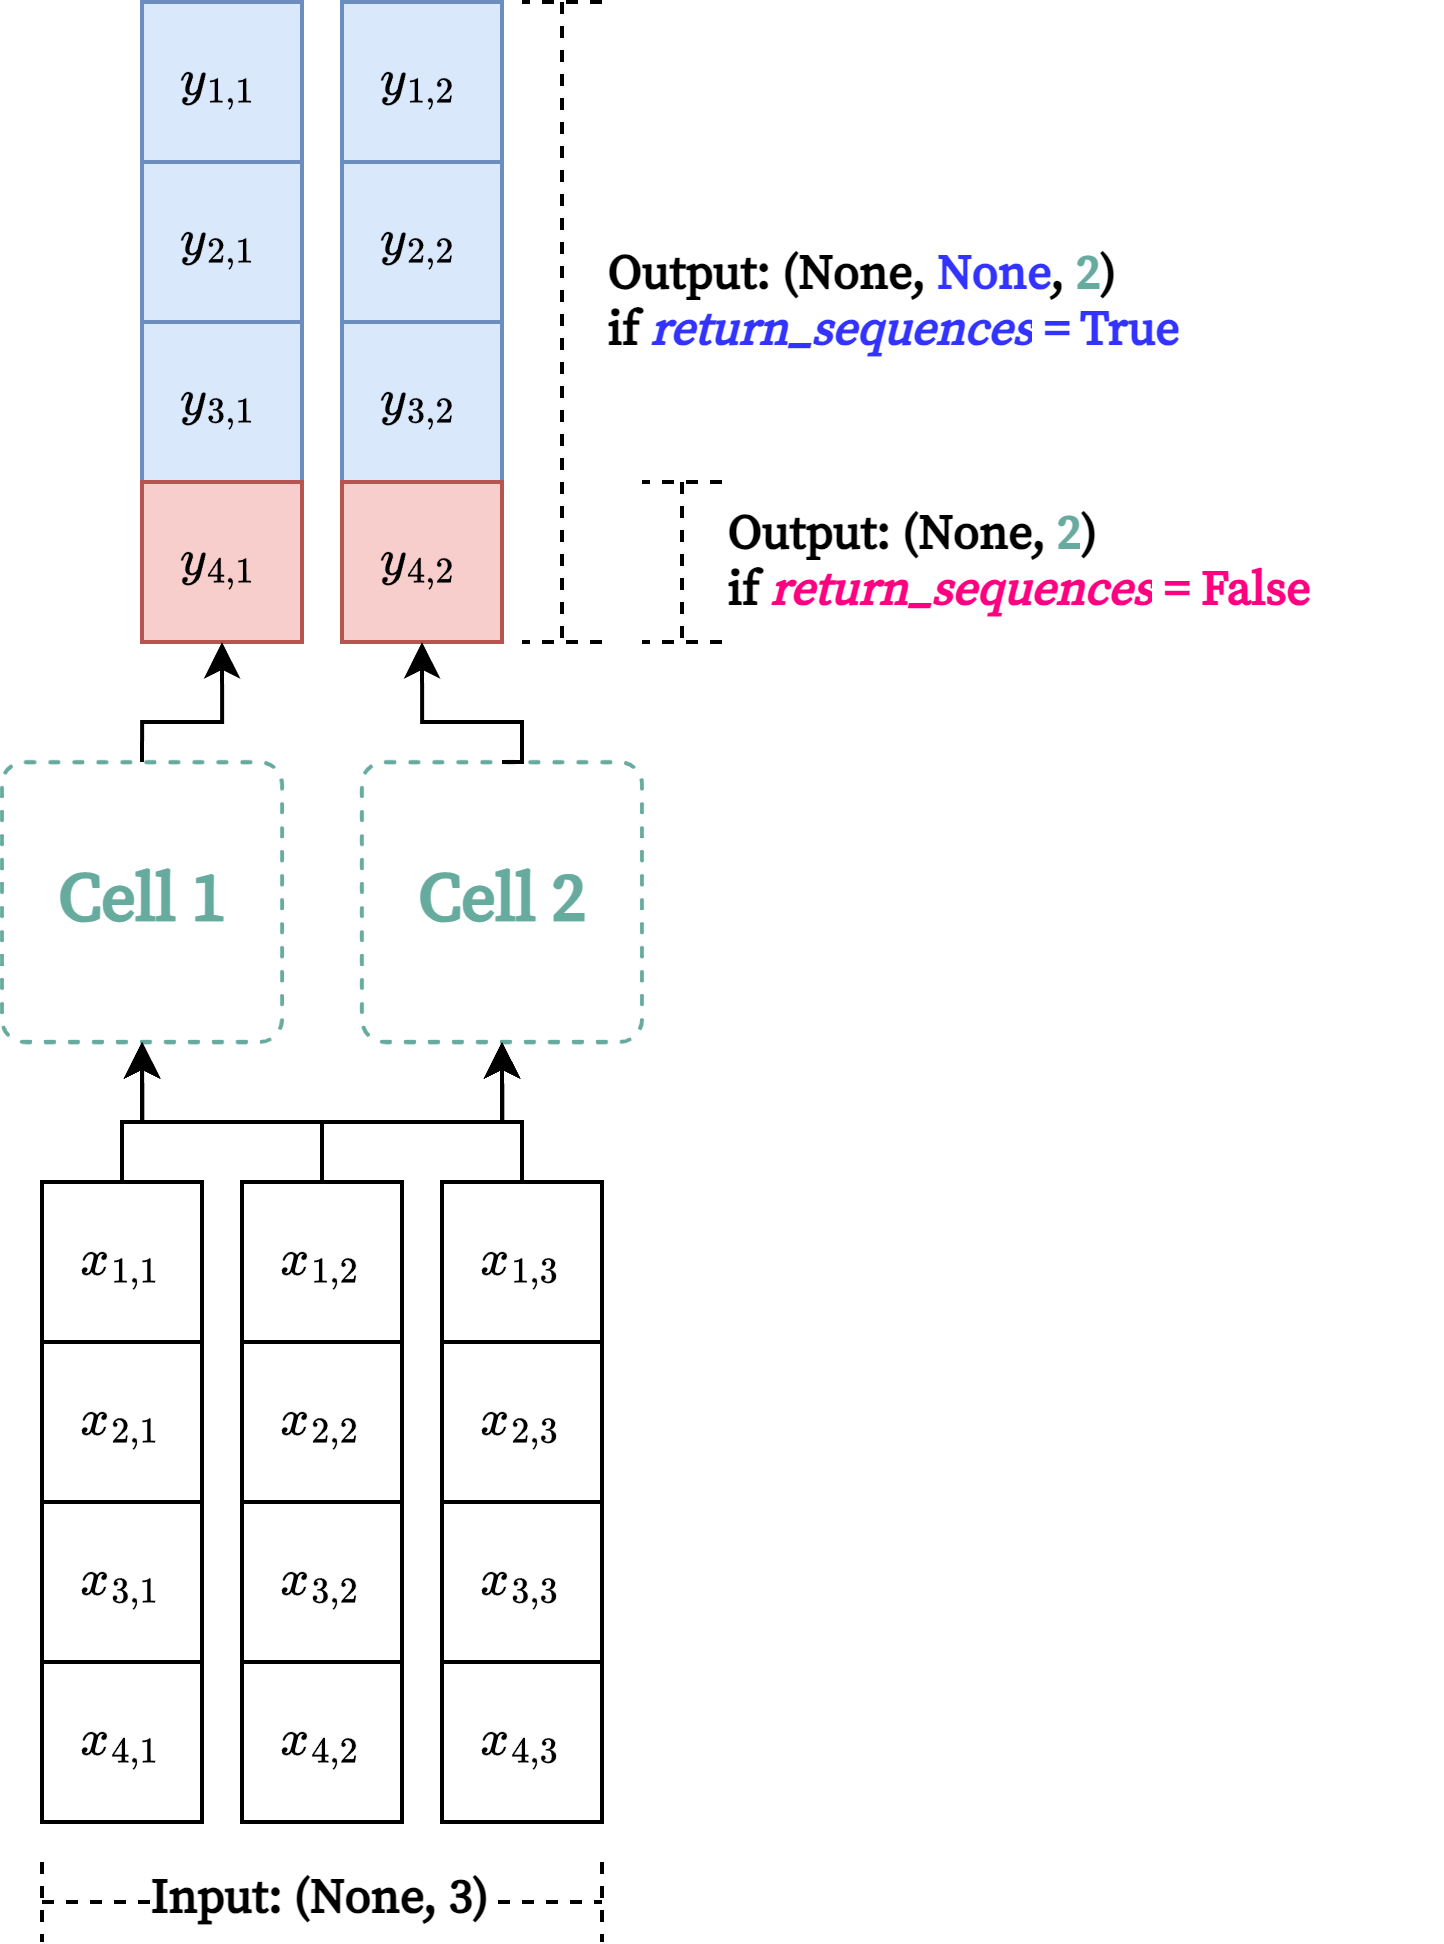</div>

기본적으로, Keras의 RNN 구현체의 출력값은 순차적 출력 중 마지막에 해당하는 값 또는 벡터만 나온다. 만약, 순차적 출력 전체를 다 출력하길 원한다면 **return_sequences** 인자 값을 **True**로 바꿔줘야 한다.

In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.Input(
        shape=(None, 3) # 3차원 입력을 받는다.
    ),
    keras.layers.SimpleRNN(
        units = 2, # Memory Cell을 두개 생성하겠다.,
        return_sequences=True # 출력값도 순차적 데이터로 받는다.
    )
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, None, 2)           12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


위에서 보다시피, **Output Shape**가 **(None, None, 2)**로 바뀐 것을 알 수 있다. 출력의 두 번째 차원이 바로 Time step을 의미하는 것이다.

RNN은 순차적 데이터를 처리하는 Neural Network다. 따라서, 두 번째 RNN 또한 입력으로 순차적 데이터를 받아야 한다. 따라서, 첫 번째 RNN의 출력을 순차적 데이터로 바꿔줘야만 한다.

# Gradient Problem

<div align='center'>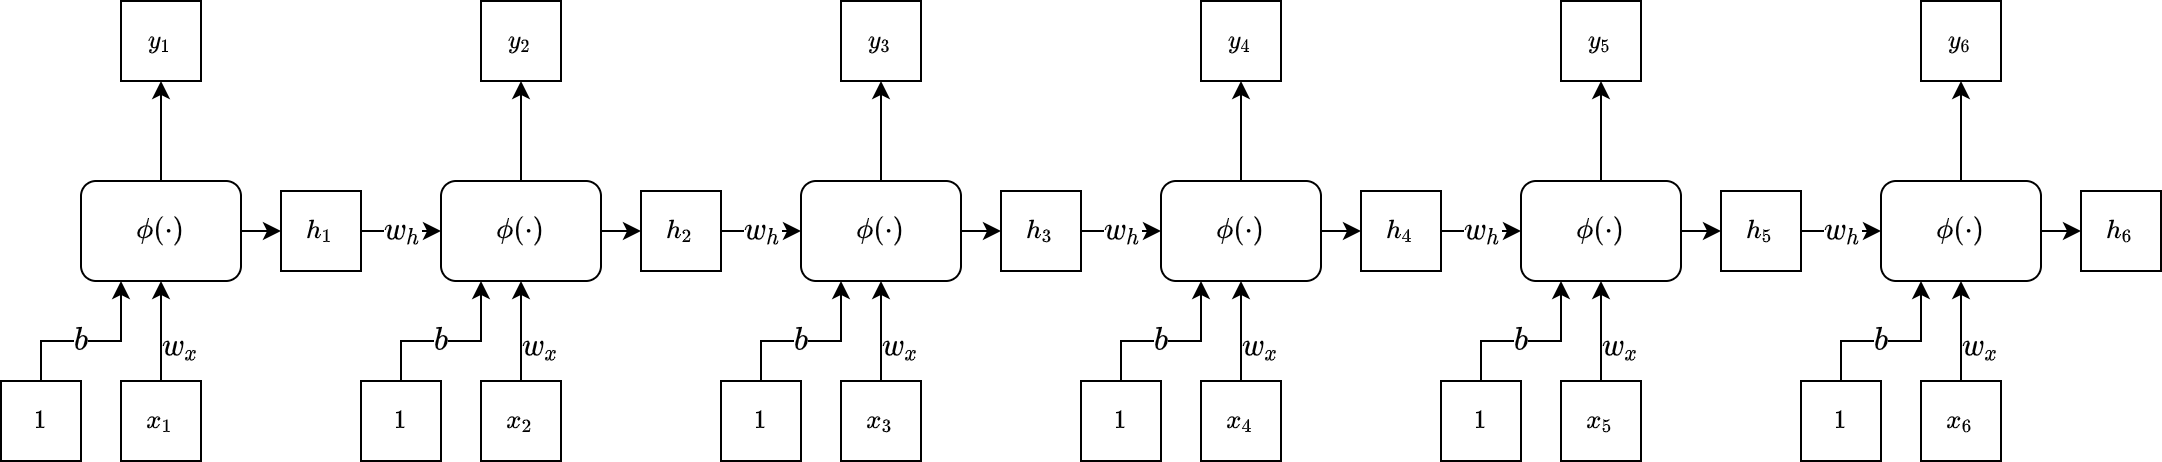</div>

RNN을 펼치게 되면 굉장히 깊은 Neural Network가 된다. 따라서, DNN 시간에 배웠던 것 처럼 Backpropagation이 제대로 동작하지 않을 가능성이 크다. 특히, RNN은 Loss Gradient가 폭발적으로 커지는 문제(기울기 폭주)가 자주 발생한다. 이를 방지하기 위한 방법을 알아보자.

## Gradient Clipping
가장 간단하게는, 이미 배웠던 대로 Gradient Clipping 을 활용하면 된다.

In [ ]:
from tensorflow import keras


model = keras.models.Sequential()
model.compile(
    optimizer=keras.optimizers.SGD(
        clipvalue=1.0 # Gradient의 값을 [-1, 1] 사이로 제한한다.
    )
)

## Using Saturating Activating Function


<div align='center'>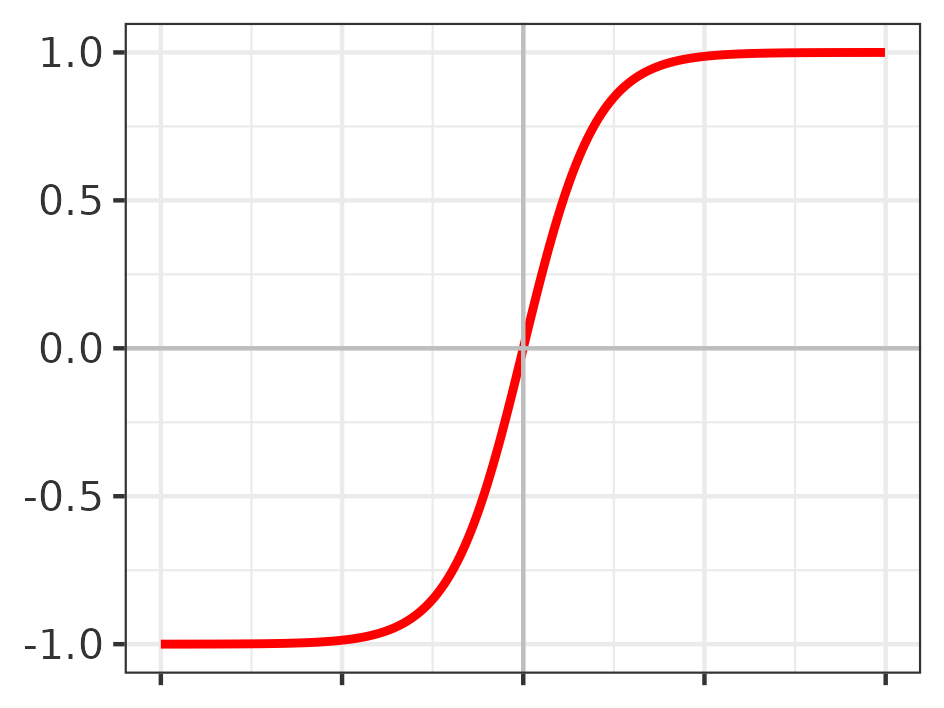</div>

또 다른 방법은 Sigmoid나 Hyperbolic Tangent와 같은 Saturating Activation Function을 활용하는 것이다. 물론, 오해하지 말아야 할 것이, 훈련 초기부터 강제로 Saturation을 시킨다는 게 아니다.

사실, Keras의 RNN 선언 시 기본값으로 이미 Hyperbolic Tangent를 활용하도록 되어 있다.

```python
tf.keras.layers.SimpleRNN(
    units,
    activation='tanh', # Hyperbolic Tangent
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,
    **kwargs
)
```



## Layer Normalization


이번엔 열 단위의 샘플들을 표준화하는 Batch Normalization 대신, 다음과 같이 행 단위의 서로 다른 차원의 샘플들을 표준화하는 Layer Normalization을 적용해보자. [keras.layers.LayerNormalization](https://keras.io/api/layers/normalization_layers/layer_normalization/)을 모델에 추가하면 된다.

\begin{align}
h(x_j) &= \gamma \frac{x_j - \mu}{\sqrt{\sigma^2 + \epsilon}} + \beta\\
\text{where}&\quad \mu: \text{a mean of features}\\
&\quad \sigma^2: \text{a variance of features}\\
&\quad \gamma: \text{a rescaling parameter trained via backpropagation}\\
&\quad \beta: \text{a offsetting parameter trained via backpropagation}\\
&\quad \epsilon: \text{a hyperparameter for preventing zero-division}\\
\end{align}




In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.Input(
        shape=(None, 3) # 3차원 입력을 받는다.
    ),
    keras.layers.SimpleRNN(
        units = 2, # Memory Cell을 두개 생성하겠다.
    ),
    keras.layers.LayerNormalization()
])

model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_32 (SimpleRNN)   (None, 2)                 12        
                                                                 
 layer_normalization_13 (La  (None, 2)                 4         
 yerNormalization)                                               
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


보다시피, Layer Normalization 에서는 4개의 매개변수를 학습하는 것을 알 수 있다. 바로 각 차원 별로 Rescaling 및 Offset을 담당하는 $\beta$와 $\gamma$다 (2차원 X $\gamma,~\beta$).

또한, Batch Normalization과는 다르게 Non-trainable Parameter가 없다. Batch Normalization의 경우 Mini-batch 사이즈만큼의 샘플들이 들어와야 평균과 분산이 계산되는 반면, Layer Normalization의 경우 하나의 샘플이 들어와도 곧바로 평균과 분산이 계산되기 때문이다.

# Long-Term Dependency Problem


그럼, Long-Term Dependency 를 제대로 학습할 수 있는 LSTM과 GRU를 사용해보자. 각각 [keras.layers.LSTM](https://keras.io/api/layers/recurrent_layers/lstm/)과 [keras.layers.GRU](https://keras.io/api/layers/recurrent_layers/gru/)를 사용하면 된다.

 ## Long Short-Term Memory (LSTM)

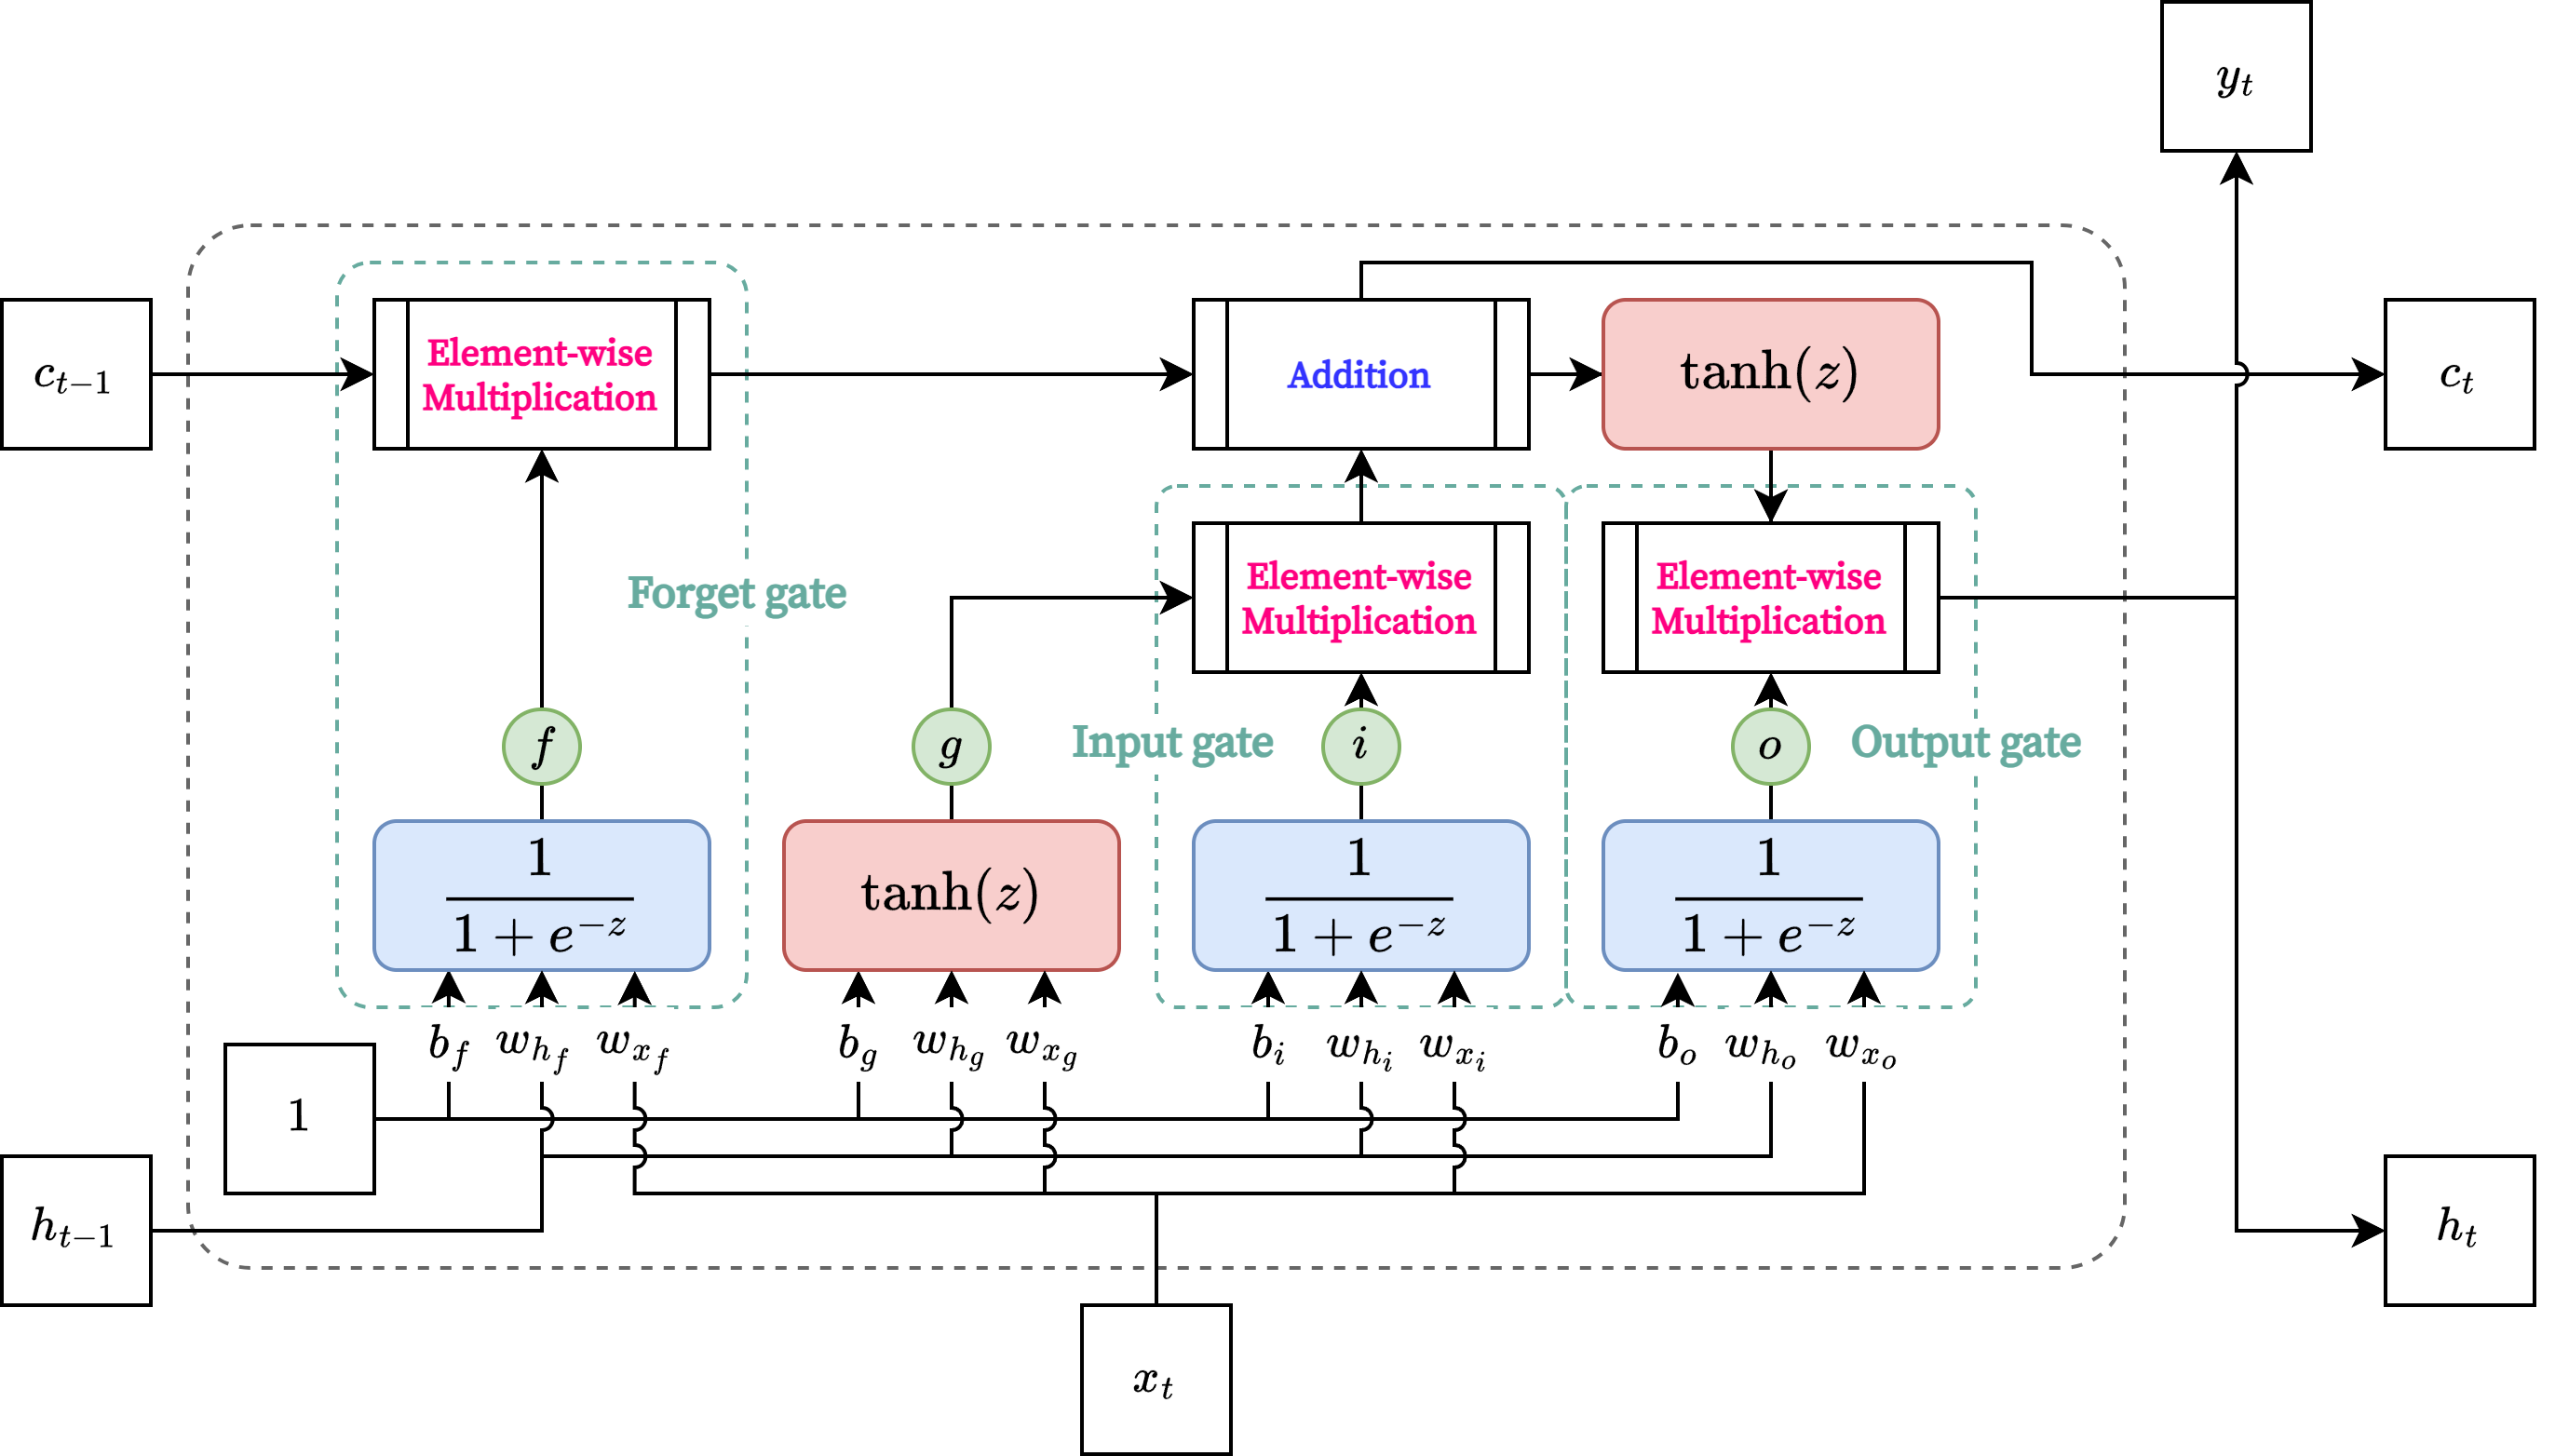

In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.Input(
        shape=(None, 3) # 3차원 입력을 받는다.
    ),
    keras.layers.LSTM(
        units = 4, # Memory Cell을 세 개 생성한다.
    ),
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 128       
                                                                 
Total params: 128 (512.00 Byte)
Trainable params: 128 (512.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


128개의 매개변수를 학습해야 하는 것을 알 수 있다. 각각 다음과 같다.
* 입력에 대한 매개변수: 3차원 X 4개셀 X 4 (3개 게이트 및 1개 출력) = 48개
* 상태에 대한 매개변수: 4개셀 X 4개셀 X 4 (3개 게이트 및 1개 출력) = 64개
* 편차: 1 X 4개셀 X 4 (3개 게이트 및 1개 출력) = 16

## Gated Recurrent Unit (GRU)

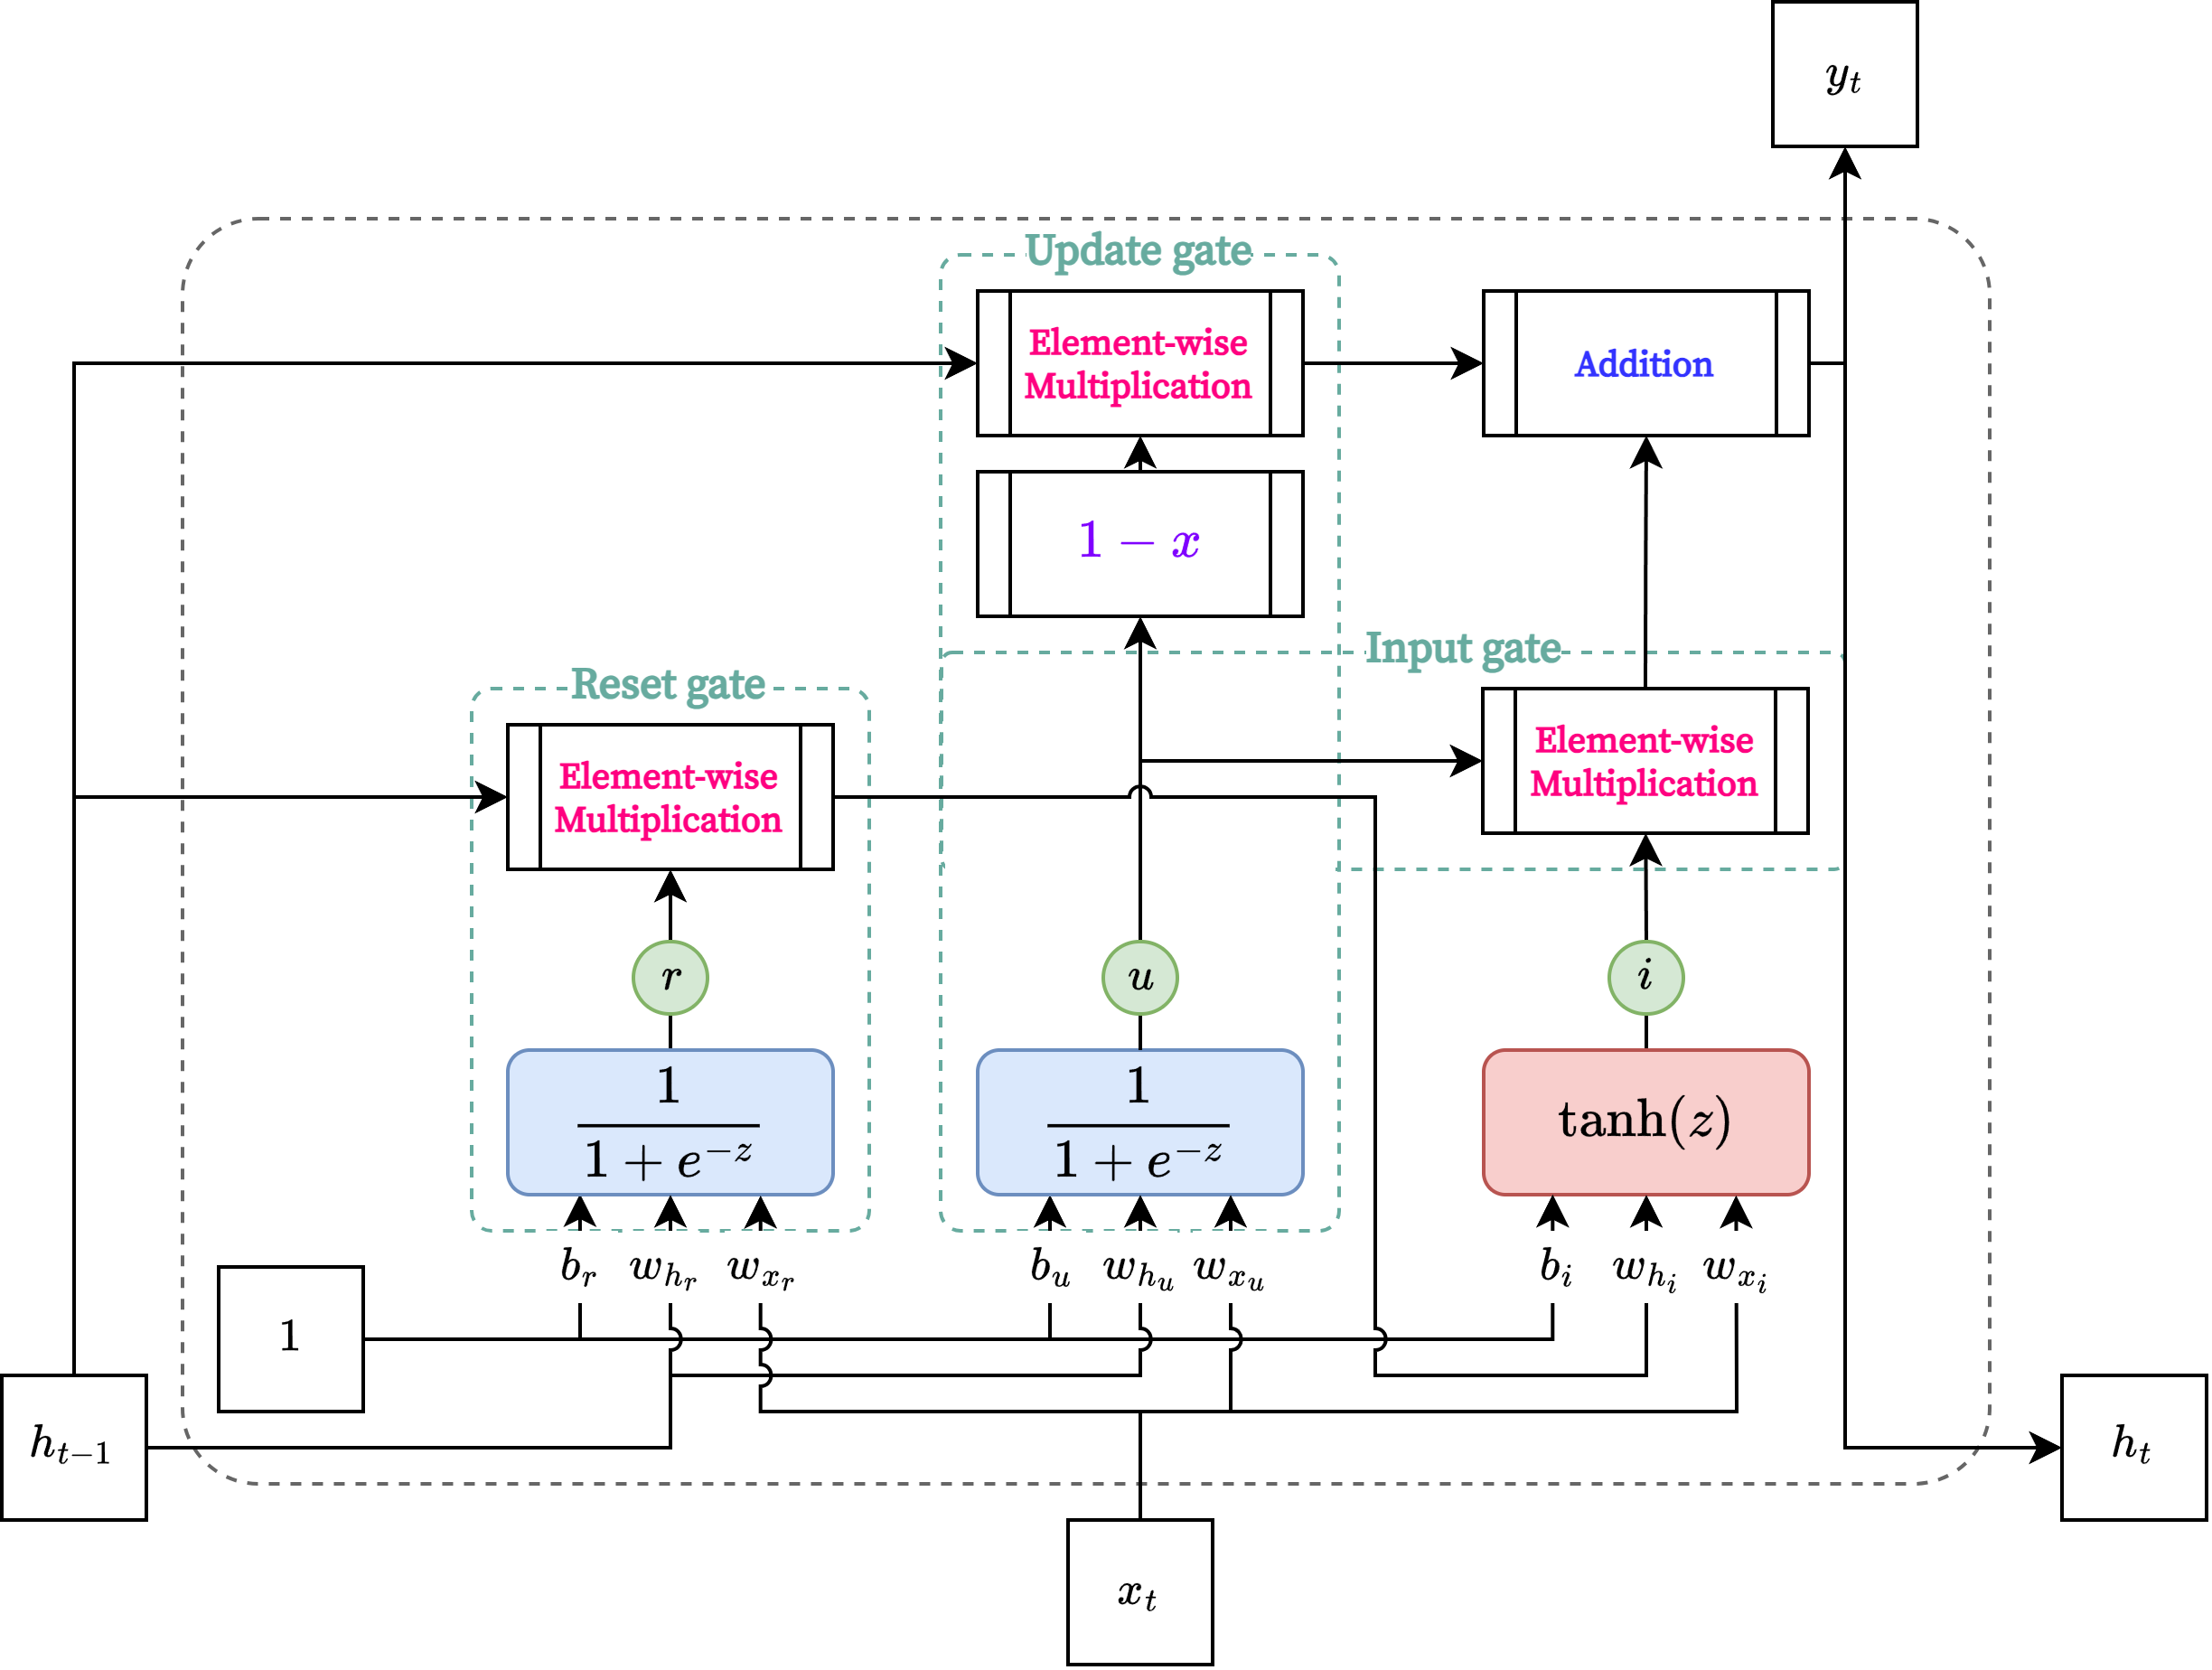

In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.Input(
        shape=(None, 3) # 3차원 입력을 받는다.
    ),
    keras.layers.GRU(
        units = 4, # Memory Cell을 세 개 생성한다.
    ),
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 4)                 108       
                                                                 
Total params: 108 (432.00 Byte)
Trainable params: 108 (432.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


108개의 매개변수를 학습해야 하는 것을 알 수 있다. 각각 다음과 같다.
* 입력에 대한 매개변수: 3차원 X 4개셀 X 3 (2개 게이트 및 1개 출력) = 36개
* 상태에 대한 매개변수: 4개셀 X 4개셀 X 3 (2개 게이트 및 1개 출력) = 48개
* 편차: 1 X 4개셀 X 3 (2개 게이트 및 1개 출력) = 12

이렇게만 계산하면 96개, 즉 12개가 빈다. 어떻게 된 걸까?

실제 Keras에서 GRU의 구현에는 GPU 최적화를 위해서 원본 GRU에 추가적인 구현이 들어가 있다. 해당 구현체에는 각 셀마다 추가적인 편차가 하나 더 있다. 따라서, 추가적인 편차 12개 (1 X 4개셀 X 3)가 더해진다.

# Convolution + LSTM




### CNN + LSTM
다음 그림처럼 Convolution Layer로 특성값 추출, LSTM으로 순차적 데이터를 예측하는 건 어떻게 할까?


<div align='center'>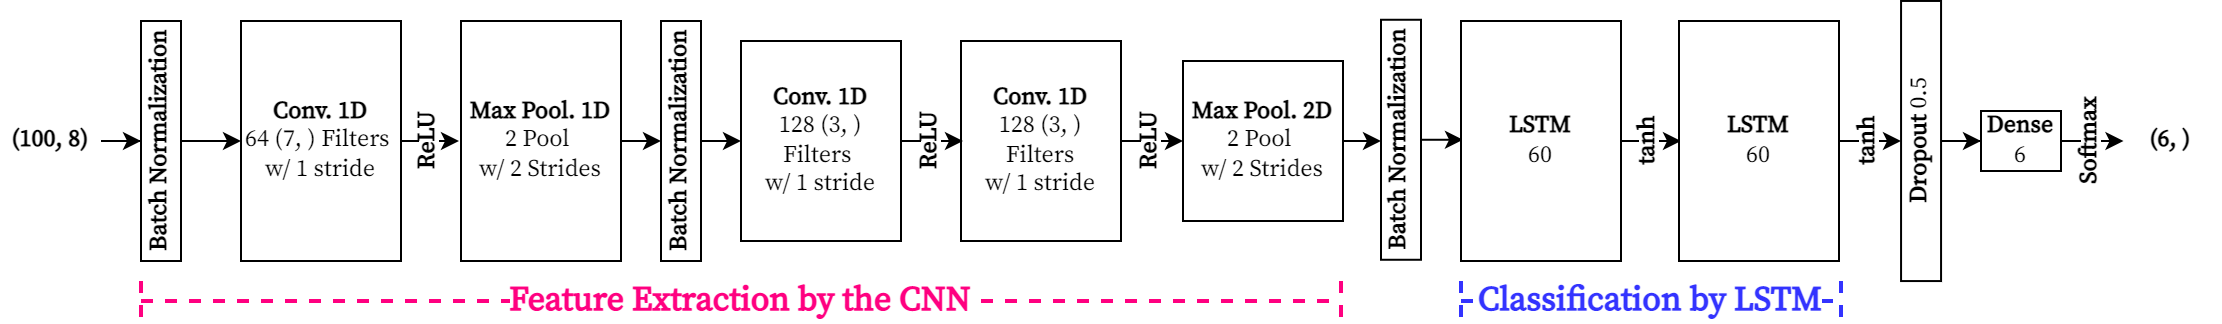</div>

별로 어렵지 않다. 그냥 지난 시간에 했던 것 처럼 Convolution Layer를 추가하고, 뒤쪽에 LSTM 등을 추가하면 된다.

## ConvLSTM

위 처럼 Layer 단위로 나누지 말고, 아예 직접적으로 LSTM의 입력을 Convolution 연산을 통해 넣고 싶다면 별도의 구현체를 사용해야 한다. 바로, [keras.layers.ConvLSTM1D](https://keras.io/api/layers/recurrent_layers/conv_lstm1d/)이다.

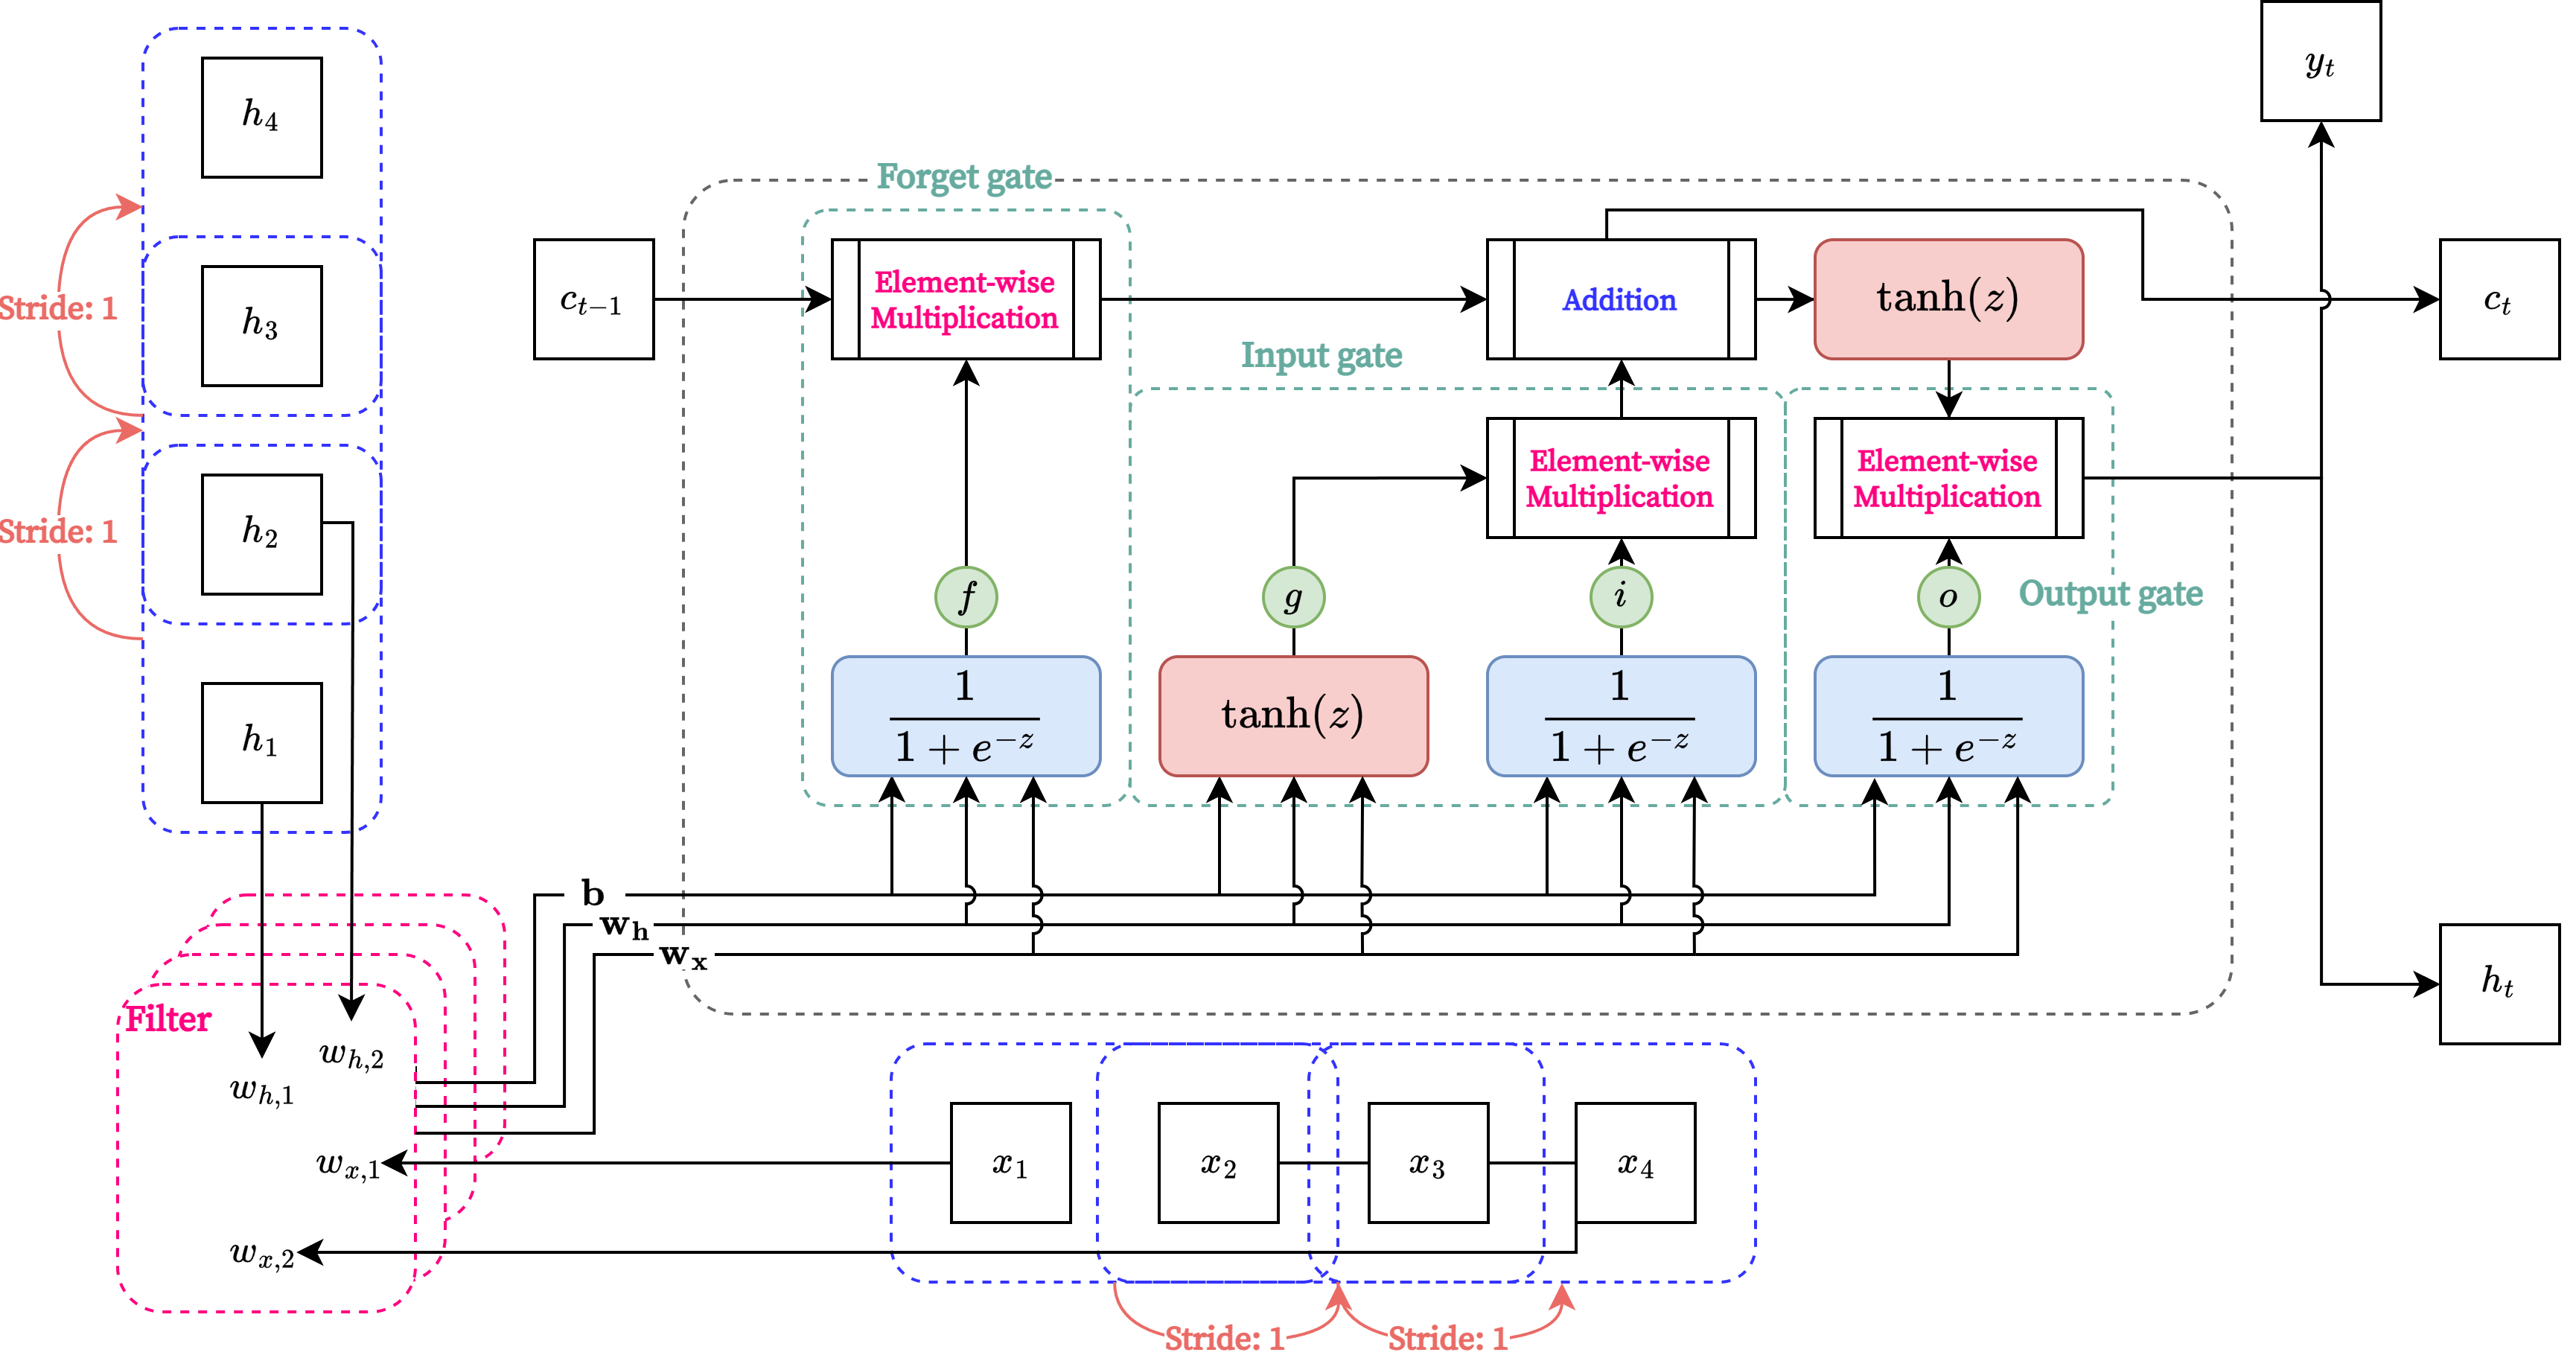

In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.layers.Input(
        shape=(None, 4, 3)
    ),
    keras.layers.ConvLSTM1D(
        kernel_size = 2,
        strides = 1,
        filters = 4,
        padding = 'same'
    )
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm1d (ConvLSTM1D)    (None, 4, 4)              240       
                                                                 
Total params: 240 (960.00 Byte)
Trainable params: 240 (960.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


위의 예제를 보자.
* Input: 4 X 3 크기의 순차적 데이터로, 예를 들어 비디오 클립 같은 걸 생각해볼 수 있다.
* Convolution on Inputs: 4 X 3 입력 데이터에 대해 크기 2의 Filter로 1D Convolution을 하게 된다면 필요한 매개변수의 수는 다음과 같다:
    * 가중치: 3차원 X 크기 2 필터 X 4개 필터 = 24개
    * 편차: 1 X 4개 필터 = 4개
    * 총합: 28개 X 4 (3개 게이트 및 1개 출력) = 96개
* Convolution on Inputs: 상태는 4 (행) X 4 (필터 수)로 출력이 되므로, 이에 대해 1D Convolution을 하게 된다면 필요한 매개변수의 수는 다음과 같다:
    * 가중치: 4차원 X 크기 2 필터 X 4개 필터 = 32개
    * 편차: 1 X 4개 필터 = 4개
    * 총합: 36개 X 4 (3개 게이트 및 1개 출력) = 144
따라서, 훈련 시켜야 하는 매개변수는 240개가 된다.

# Example: Ridership Data

이번 실습에서는 시카고의 일일 버스 및 열차 사용량 데이터인 [Ridership](https://data.cityofchicago.org/Transportation/CTA-Ridership-Daily-Boarding-Totals/6iiy-9s97/about_data) 데이터를 활용해보겠다.

## Data Loading

In [ ]:
import pandas as pd


URL_RIDERSHIP = 'https://drive.usercontent.google.com/download?export=download&confirm=t&id=1B3FGFittbv6dCLlDRaPeKJQJVZLrt1du'
RIDERSHIP = pd.read_csv(URL_RIDERSHIP, parse_dates=['service_date']).set_index(
    'service_date'
).sort_index()
RIDERSHIP

,day_type,bus,rail_boardings,total_rides
service_date,,,,
2001-01-01,U,297192,126455,423647
2001-01-02,W,780827,501952,1282779
2001-01-03,W,824923,536432,1361355
2001-01-04,W,870021,550011,1420032
2001-01-05,W,890426,557917,1448343
...,...,...,...,...
2021-11-26,W,257700,189694,447394
2021-11-27,A,237839,187065,424904
2021-11-28,U,184817,147830,332647


**day_type**은 W = 평일, A =  토요일, U = 일요일 또는 휴일이다.

재현성을 위해서 Random Seed를 고정하자.

In [ ]:
from tensorflow import keras


keras.utils.set_random_seed(42)

## Visualization
학습 모델을 만들기 전에, 데이터를 시각화해보자. 2001년부터 모인 데이터라 워낙에 양이 방대하므로, 월 별로 평균을 내서 시각화하겠다.

In [ ]:
import altair as alt


alt.data_transformers.disable_max_rows()

df = RIDERSHIP.resample('M').mean(numeric_only=True).reset_index().melt(
    id_vars=['service_date'], value_vars=['bus', 'rail_boardings'],
    var_name='type'
)

alt.Chart(df).encode(
    x='service_date:T', y='value:Q', color='type:N'
).mark_line()

alt.Chart(...)

2020년부터 확 감소한 것을 알 수 있는데, COVID-19 때문일 것이다.

## Preparation

일단 성능을 검증하기 위해서 전체 데이터를 두 개로 나누겠다. 2001년부터 2018년까지의 데이터를 훈련 데이터셋, 2019년의 데이터를 검증 데이터셋으로 사용하며, 버스 사용량만을 예측하겠다.

또한, 위에서 보듯이 값의 단위가 너무나도 크기 때문에 (10만 단위), 10만으로 나눠서 값의 스케일을 조정하겠다.

In [ ]:
bus_train = RIDERSHIP["2002-01":"2018-12"]['bus'] / 1e6
bus_valid = RIDERSHIP["2019-01":"2019-12"]['bus'] / 1e6

위 데이터를 Keras의 RNN이 알아들을 수 있는 순차적 데이터로 변경해야 한다. 30일 동안 수집된 버스 사용량으로부터 31일째의 버스 사용량을 예측한다고 생각해보자. 그럼 데이터 형식은 다음과 같다:
\begin{align}
\begin{matrix}
t = 1:  & X = [x_1, x_2, \cdots, x_{30}] & y = x_{31} \\
t = 2:  & X = [x_2, x_3, \cdots, x_{31}] & y = x_{32} \\
t = 3:  & X = [x_3, x_4, \cdots, x_{33}] & y = x_{33} \\
& \vdots &
\end{matrix}
\end{align}


이런 식으로 훈련 데이터와 검증 데이터를 준비해주자.

In [ ]:
import numpy as np


X_train, y_train = [], []
n = len(bus_train)
arr = bus_train.values

for i in range(n - 30):
    X_train.append(arr[i:i + 30])
    y_train.append(arr[i + 30])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
import numpy as np


X_valid, y_valid = [], []
n = len(bus_valid)
arr = bus_valid.values

for i in range(n - 30):
    X_valid.append(arr[i:i + 30])
    y_valid.append(arr[i + 30])

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

## Single Memory Cell

그럼, Memory Cell이 하나만 있는 단순한 RNN을 만들어보자.

In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.Input(
        shape=(None, 1)
    ),
    keras.layers.SimpleRNN(
        units=1
    )
])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow import keras


model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(clipvalue=1.0)
)

model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=100,
    shuffle=False,
    validation_data=(X_valid, y_valid)
)

Epoch 1/100
97/97 [==============================] - 2s 9ms/step - loss: 0.0588 - val_loss: 0.0631
Epoch 2/100
97/97 [==============================] - 1s 7ms/step - loss: 0.0507 - val_loss: 0.0457
Epoch 3/100
97/97 [==============================] - 1s 6ms/step - loss: 0.0500 - val_loss: 0.0427
Epoch 4/100
97/97 [==============================] - 1s 7ms/step - loss: 0.0501 - val_loss: 0.0425
Epoch 5/100
97/97 [==============================] - 1s 7ms/step - loss: 0.0501 - val_loss: 0.0424
Epoch 6/100
97/97 [==============================] - 1s 6ms/step - loss: 0.0501 - val_loss: 0.0423
Epoch 7/100
97/97 [==============================] - 1s 7ms/step - loss: 0.0500 - val_loss: 0.0423
Epoch 8/100
97/97 [==============================] - 1s 6ms/step - loss: 0.0500 - val_loss: 0.0422
Epoch 9/100
97/97 [==============================] - 1s 7ms/step - loss: 0.0500 - val_loss: 0.0421
Epoch 10/100
97/97 [==============================] - 1s 7ms/step - loss: 0.0499 - val_loss: 0.0421
Epoch 11/

In [ ]:
import altair as alt
import pandas as pd


y_pred = model.predict(X_valid).ravel()

df = pd.DataFrame({
    'time_step': np.arange(len(y_valid)),
    'true': y_valid,
    'pred': y_pred,
}).melt(
    id_vars=['time_step'], var_name='type'
)

alt.Chart(df).encode(
    x='time_step:Q', y='value:Q', color='type:N'
).mark_line().properties(
    width=1000
)

11/11 [==============================] - 0s 3ms/step


alt.Chart(...)

전체적으로 비슷해보이진 하지만, 정확하게 일치하는 것으로 보이진 않는다.

## More Cells

이번엔 32개의 Memory Cell을 지닌 RNN을 훈련시키겠다. 주의할 점은 Memory Cell이 32차원의 출력을 낼 것이므로, 이 출력값을 단일 값으로 변경시켜줘야 한다는 것이다. 따라서, 마지막에 Perceptron이 하나만 있는 Dense Layer을 연결시켜야 한다.

In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.Input(
        shape=(None, 1)
    ),
    keras.layers.SimpleRNN(
        units=32
    ),
    keras.layers.Dense(
        units=1
    )
])

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_14 (SimpleRNN)   (None, 32)                1088      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow import keras


model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(clipvalue=1.0)
)

model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=100,
    shuffle=False,
    validation_data=(X_valid, y_valid)
)

Epoch 1/100
97/97 [==============================] - 2s 10ms/step - loss: 0.0721 - val_loss: 0.0143
Epoch 2/100
97/97 [==============================] - 1s 7ms/step - loss: 0.0147 - val_loss: 0.0100
Epoch 3/100
97/97 [==============================] - 1s 8ms/step - loss: 0.0121 - val_loss: 0.0084
Epoch 4/100
97/97 [==============================] - 1s 8ms/step - loss: 0.0110 - val_loss: 0.0076
Epoch 5/100
97/97 [==============================] - 1s 8ms/step - loss: 0.0104 - val_loss: 0.0070
Epoch 6/100
97/97 [==============================] - 1s 12ms/step - loss: 0.0099 - val_loss: 0.0067
Epoch 7/100
97/97 [==============================] - 1s 13ms/step - loss: 0.0095 - val_loss: 0.0064
Epoch 8/100
97/97 [==============================] - 1s 12ms/step - loss: 0.0092 - val_loss: 0.0062
Epoch 9/100
97/97 [==============================] - 1s 9ms/step - loss: 0.0090 - val_loss: 0.0060
Epoch 10/100
97/97 [==============================] - 1s 7ms/step - loss: 0.0088 - val_loss: 0.0058
Epoch

In [ ]:
import altair as alt
import pandas as pd


y_pred = model.predict(X_valid).ravel()

df = pd.DataFrame({
    'time_step': np.arange(len(y_valid)),
    'true': y_valid,
    'pred': y_pred,
}).melt(
    id_vars=['time_step'], var_name='type'
)

alt.Chart(df).encode(
    x='time_step:Q', y='value:Q', color='type:N'
).mark_line().properties(
    width=1000
)

11/11 [==============================] - 0s 3ms/step


alt.Chart(...)

Cell이 하나만 있는 것 보다 훨씬 성능이 좋아진 것을 확인할 수 있다.

## Stacked RNN
이번엔 RNN을 여러개 연결시켜보자.

In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.Input(
        shape=(None, 1)
    ),
    keras.layers.SimpleRNN(
        units=32,
        return_sequences=True
    ),
    keras.layers.SimpleRNN(
        units=32,
        return_sequences=False
    ),
    keras.layers.Dense(
        units=1
    )
])

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_17 (SimpleRNN)   (None, None, 32)          1088      
                                                                 
 simple_rnn_18 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow import keras


model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(clipvalue=1.0)
)

model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=100,
    shuffle=False,
    validation_data=(X_valid, y_valid)
)

Epoch 1/100
97/97 [==============================] - 4s 18ms/step - loss: 0.0209 - val_loss: 0.0069
Epoch 2/100
97/97 [==============================] - 2s 22ms/step - loss: 0.0104 - val_loss: 0.0062
Epoch 3/100
97/97 [==============================] - 2s 23ms/step - loss: 0.0097 - val_loss: 0.0058
Epoch 4/100
97/97 [==============================] - 1s 14ms/step - loss: 0.0093 - val_loss: 0.0056
Epoch 5/100
97/97 [==============================] - 1s 15ms/step - loss: 0.0091 - val_loss: 0.0054
Epoch 6/100
97/97 [==============================] - 1s 15ms/step - loss: 0.0088 - val_loss: 0.0053
Epoch 7/100
97/97 [==============================] - 1s 14ms/step - loss: 0.0086 - val_loss: 0.0052
Epoch 8/100
97/97 [==============================] - 2s 16ms/step - loss: 0.0084 - val_loss: 0.0051
Epoch 9/100
97/97 [==============================] - 1s 15ms/step - loss: 0.0083 - val_loss: 0.0051
Epoch 10/100
97/97 [==============================] - 2s 17ms/step - loss: 0.0082 - val_loss: 0.0051

In [ ]:
import altair as alt
import pandas as pd


y_pred = model.predict(X_valid).ravel()

df = pd.DataFrame({
    'time_step': np.arange(len(y_valid)),
    'true': y_valid,
    'pred': y_pred,
}).melt(
    id_vars=['time_step'], var_name='type'
)

alt.Chart(df).encode(
    x='time_step:Q', y='value:Q', color='type:N'
).mark_line().properties(
    width=1000
)

11/11 [==============================] - 0s 4ms/step


alt.Chart(...)

미묘하게 더 나아진 것 처럼 보인다 :)

# Etc.
본 예제에서 다루지는 않았지만, 만약 Text 분류에 관심이 있다면 다음 예제를 참고하자: [https://www.tensorflow.org/text/tutorials/text_classification_rnn](https://www.tensorflow.org/text/tutorials/text_classification_rnn)